# Suhani's Wrapped
This is my personal project where I explore my Spotify data for the years 2022 to 2023 and try and understand what I can about my own data and song preferences. 

First we import a few packages: 

In [1]:
import json
import csv
import pandas as pd
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

## File Background Information
I downloaded this information from my Spotify account. For the record this is only the last couple of years because it is not the comprehensive data download. 
As I have been using Spotify since 2018 I anticipate that it will take longer for them to get that information to me. 
'streaming0' contains all the information from the end of the 2022 collection year. This spans from November 30th, 2022 up until October 25th, 2023. <br>
'streaming1' contains everything I have listened to since October 25th, 2023 until December 1st, 2023 which would coincide with the date that this data was delivered to me.

In [2]:
streaming1 = pd.read_json('Spotify Account Data/StreamingHistory1.json')
streaming1.to_csv('Streaming1.csv')
streaming0 = pd.read_json('Spotify Account Data/StreamingHistory0.json')
streaming0.to_csv('Streaming0.csv')

Below we see the two data frames. The first thing I notice is that 'streaming0' seems to stop at 10,000 rows which I find interesting that it is a rounded number. I do not know if that is a conincidence or a specific choice by Spotify in how they package the 'abridged' data package. 

In [3]:
streaming0

,endTime,artistName,trackName,msPlayed
0,2022-11-30 20:22,Little Mix,No,181587
1,2022-12-01 09:47,BTS,Run BTS,204939
2,2022-12-01 09:48,SF9,O Sole Mio,17287
3,2022-12-01 09:51,TOMORROW X TOGETHER,Good Boy Gone Bad,191038
4,2022-12-01 09:54,NCT DREAM,BOOM,195080
...,...,...,...,...
9995,2023-10-25 22:36,KAI,Rover,174506
9996,2023-10-25 22:39,MONSTA X,WHO DO U LOVE? (feat. French Montana),189035
9997,2023-10-25 22:42,BLACKPINK,PLAYING WITH FIRE,197288
9998,2023-10-25 22:43,JENNIE,You & Me,37441


In [4]:
streaming1

,endTime,artistName,trackName,msPlayed
0,2023-10-25 23:03,MONSTA X,WHO DO U LOVE? (feat. French Montana),26476
1,2023-10-26 01:56,KAI,Rover,174506
2,2023-10-26 01:59,MONSTA X,WHO DO U LOVE? (feat. French Montana),189035
3,2023-10-26 02:02,JENNIE,You & Me,15312
4,2023-10-26 02:02,BLACKPINK,PLAYING WITH FIRE,197288
...,...,...,...,...
3284,2023-12-01 20:44,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,289790
3285,2023-12-01 20:47,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,158360
3286,2023-12-01 20:57,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,5560
3287,2023-12-01 22:56,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,284529


To make it easier to work with these data frames I am going to combine them into a single data frame that I will call 'streaming' so that it represents the entire listening year for 2023. <br> First I define a list of both the data frame names to contain both years. Then we define the new data frame as the concatenation of the list of data frames stored in 'both_years'. <br> Note: The order of the data frame are listed such that the new data frame remains in chronological order.

In [5]:
both_years = [streaming0, streaming1]
streaming = pd.concat(both_years)

Now we can see all the songs I have listened to since November 30th, 2022. 

In [6]:
streaming

,endTime,artistName,trackName,msPlayed
0,2022-11-30 20:22,Little Mix,No,181587
1,2022-12-01 09:47,BTS,Run BTS,204939
2,2022-12-01 09:48,SF9,O Sole Mio,17287
3,2022-12-01 09:51,TOMORROW X TOGETHER,Good Boy Gone Bad,191038
4,2022-12-01 09:54,NCT DREAM,BOOM,195080
...,...,...,...,...
3284,2023-12-01 20:44,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,289790
3285,2023-12-01 20:47,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,158360
3286,2023-12-01 20:57,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,5560
3287,2023-12-01 22:56,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,284529


## My Listening History with BTS

BTS has been one of my all-time favorite artists consistently over the past few years. The reason I downloaded Spotify at all was to be able to listen to their music while also multi-tasking. <br>
Until I get more data this will just be my initial exploration of what I can do with this information and then we can do a more comprehensive review once I get my extended data package. <br>
I intend to get a better understanding of the amount of time I spend listening to BTS songs. 

First I query out all the times I listened to BTS:

In [49]:
bts = streaming[streaming['artistName']=='BTS']

array(['Run BTS', 'We are Bulletproof : the Eternal',
       'Answer : Love Myself', 'Trivia 起 : Just Dance', 'Pied Piper',
       'Intro: Singularity', 'Epilogue: Young Forever', 'Save Me',
       'Heartbeat (BTS World Original Soundtrack)', 'Spring Day',
       'Not Today', 'Epiphany', 'Friends', 'Black Swan', 'Jamais Vu',
       'HOME', 'House of Cards - Full Length Edition', 'Love Maze',
       'FAKE LOVE', 'I Need U', 'BTS Cypher Pt.3: Killer', 'ON',
       'BTS Cypher 4', 'Outro: Tear', 'Trivia 承 : Love', 'Silver Spoon',
       'MIC Drop (Steve Aoki Remix) - Full Length Edition', 'Filter',
       'Jump', '21st Century Girl', 'Go Go', 'Burning Up (Fire)',
       'Make It Right', 'Louder than bombs',
       'The Truth Untold (feat. Steve Aoki)', 'Intro: Serendipity',
       'Best Of Me', 'IDOL', 'Euphoria', 'Butterfly', 'dimple',
       'A Supplementary Story: You Never Walk Alone', 'Lights', '134340',
       'Mikrokosmos', 'Trivia 轉 : Seesaw', 'Outro: Wings', 'Butter',
       'Lie

The following code determines the number of rows in the bts dataframe which is equivalent to the number of times I have listened to any BTS song. 

In [8]:
total_bts = bts.shape[0]
print('The number of times I have listened to any BTS song is: ' + str(total_bts))

The number of times I have listened to any BTS song is: 1095


This line tells me the number of different BTS songs I have listened to.

In [9]:
num_unique = len(bts['trackName'].unique())
print('Over the last year I have listened to ' + str(num_unique) + ' different BTS songs.')

Over the last year I have listened to 112 different BTS songs.


Now I am curious to determine the number of hours I have spent listening to BTS songs. This can be done by querying out the 'msPlayed' column and converting its sum from milliseconds into hours. <br>
Note: I have created intermediate variables of 'total_s' and 'total_min' in case they become useful later. 

In [10]:
#First we query out the number of miliseconds played.
total_ms = bts['msPlayed'].sum()

#Then we do the following math to determine how many hours 
total_s = total_ms * 0.001
total_min = total_s / 60
total_hrs = total_min / 60

#I will round to two decimal places.
rounded_total_min = np.round(total_min, 1)
rounded_total_hrs = np.round(total_hrs, 2)

print('I have spent about ' + str(rounded_total_min) + ' minutes listening to BTS in the last year.')
print('This is equivalent to about ' + str(int(np.round(rounded_total_hrs))) + ' hours and 2 minutes of BTS in this time frame.')

I have spent about 3122.6 minutes listening to BTS in the last year.
This is equivalent to about 52 hours and 2 minutes of BTS in this time frame.


Now I want to see the distribution of the BTS songs I listened to. First we are going to group the data frame by each song and count the number of times it was played. I'll assign a new column for the number of times each song is played and create a data frame of just the song counts called 'song_counts'.

In [11]:
grouped_by_song = bts.groupby('trackName').count()
song_counts = grouped_by_song.assign(timesPlayed = grouped_by_song['endTime'])
song_counts = song_counts.sort_values('timesPlayed', ascending=False)
song_counts = song_counts.get(['timesPlayed']).reset_index()
song_counts

,trackName,timesPlayed
0,Black Swan,49
1,dimple,38
2,Filter,34
3,Run BTS,33
4,Jamais Vu,31
...,...,...
107,N.O,1
108,Outro: Luv in Skool,1
109,Outro: Wings,1
110,Permission to Dance,1


I notice that there are quite a few songs that I only listened to once so I'm going to create a list of song titles that I have only listened to one time. 

In [12]:
one_listen = song_counts[song_counts.get('timesPlayed') == 1]
one_listen = one_listen['trackName']
num_one_listen = one_listen.shape[0]
print('The number of songs I have listened to only once is ' + str(num_one_listen)+ '.')
print(one_listen)

The number of songs I have listened to only once is 28.
84       Skit: Expectation!
85           Skit: Soulmate
86                 Tomorrow
87     Skit: R U Happy Now?
88                     Stay
               ...         
107                     N.O
108     Outro: Luv in Skool
109            Outro: Wings
110     Permission to Dance
111            Just One Day
Name: trackName, Length: 28, dtype: object


Now I can transform the information such that we can create a pie chart of the amount of times I have listened to the various BTS songs. <br>
We know that the last 28 songs in our data frame were only listened to one time so we can query out the trackName and timesPlayed series and adjust them to put those 28 songs into a category called 'Other'. 

In [13]:
num_tracks = song_counts.shape[0]
tracks = song_counts['trackName']
tracks = tracks[:num_tracks-num_one_listen]
tracks = np.append(tracks, 'Other')
print(tracks)
plays = song_counts['timesPlayed']
plays = plays[:num_tracks-num_one_listen]
plays = np.append(plays, num_one_listen)
print(len(plays))

['Black Swan' 'dimple' 'Filter' 'Run BTS' 'Jamais Vu' 'I Need U'
 'Make It Right' 'FAKE LOVE' 'Friends' 'Best Of Me'
 'Heartbeat (BTS World Original Soundtrack)' 'ON' 'Mikrokosmos'
 'Pied Piper' 'Save Me' 'Love Maze' 'Go Go' 'HOME' 'Spine Breaker' 'IDOL'
 'Run' 'Answer : Love Myself' 'Converse High' 'BTS Cypher 4'
 'Intro: Singularity' 'Lights' 'Boy With Luv (feat. Halsey)'
 'Intro: Serendipity' 'We are Bulletproof : the Eternal' 'Euphoria'
 'House of Cards - Full Length Edition' 'Outro: Her' 'Trivia 承 : Love'
 'A Supplementary Story: You Never Walk Alone' '21st Century Girl'
 'Epilogue: Young Forever' 'Louder than bombs' 'Trivia 起 : Just Dance'
 'Trivia 轉 : Seesaw' 'MIC Drop (Steve Aoki Remix) - Full Length Edition'
 'Silver Spoon' 'The Truth Untold (feat. Steve Aoki)' 'Epiphany'
 'Spring Day' "I'm Fine" 'Outro: Tear' 'Not Today' 'My Time' 'Anpanman'
 'Butterfly' 'Burning Up (Fire)' 'Life Goes On' 'Telepathy' 'Jump'
 'Butter' 'Dionysus' 'Blood Sweat & Tears' 'DNA' 'Airplane pt.2'
 'BT

/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36215 (\N{CJK UNIFIED IDEOGRAPH-8D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


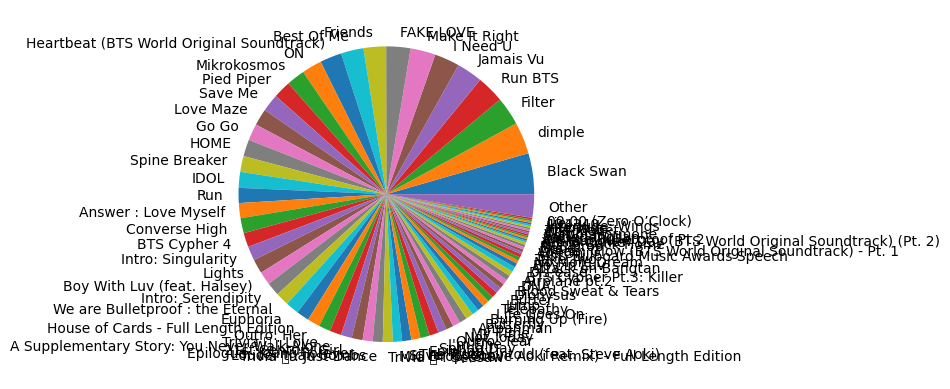

In [14]:
plt.pie(plays, labels = tracks)
plt.show()

Now I notice that this chart is quite difficult to follow just given the sheer number of songs that are included. So we are going to adjust my strategy to a bar chart instead. 

Text(0.0, 1.0, 'BTS Songs vs Times Played')

/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 36215 (\N{CJK UNIFIED IDEOGRAPH-8D77}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  func(*args, **kwargs)


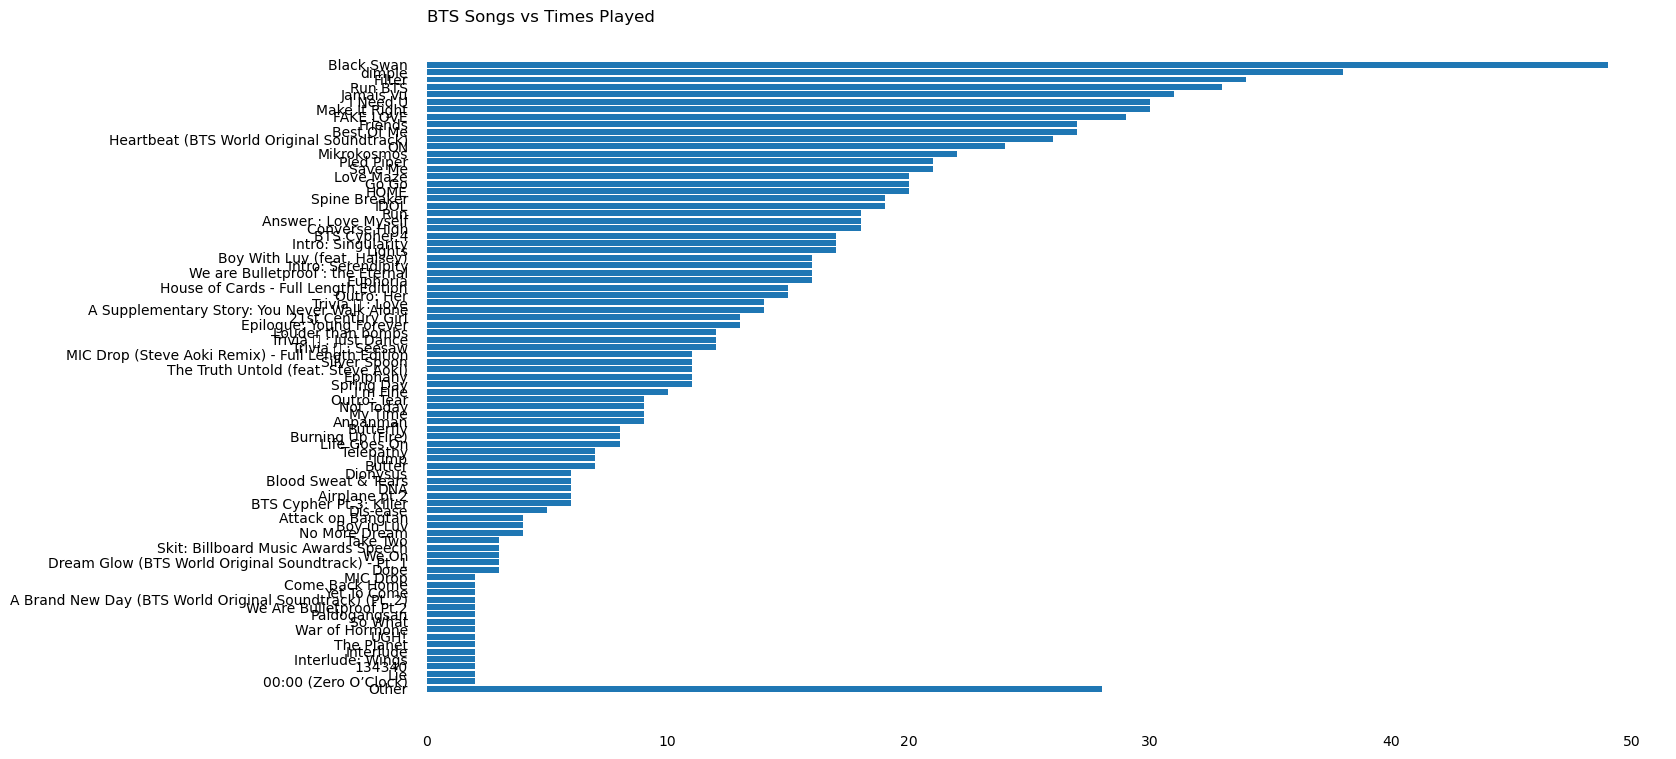

In [15]:
tracks
plays

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(tracks, plays)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.invert_yaxis()

ax.set_title('BTS Songs vs Times Played',
             loc ='left', )

Once again the information is difficult to decipher so let's just focus on my top 20 BTS songs. From this we can determine which BTS song was my favorite in the last year. <br> To do so we can use the information from song_counts but specifically take out the first 20 rows. 

In [16]:
top_20_BTS = song_counts
top_20_BTS = song_counts.take(np.arange(0, 20))
top_20_BTS

,trackName,timesPlayed
0,Black Swan,49
1,dimple,38
2,Filter,34
3,Run BTS,33
4,Jamais Vu,31
...,...,...
15,Love Maze,20
16,Go Go,20
17,HOME,20
18,Spine Breaker,19


Now we can try plotting out these top 20 songs in a pie chart and see the distribution of my favorite songs. 

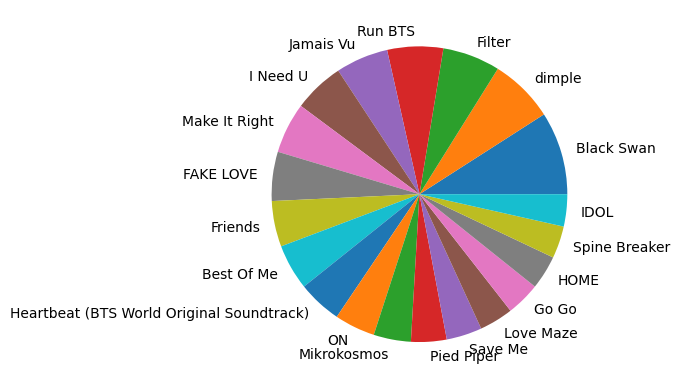

In [17]:
plt.pie(top_20_BTS['timesPlayed'], labels = top_20_BTS['trackName'])
plt.show()

Though we have the pie chart above it is still a bit difficult to visually determine which song is my favorite so let us try using the bar chart again. 

Text(0.0, 1.0, 'Top 20 BTS Songs vs Times Played')

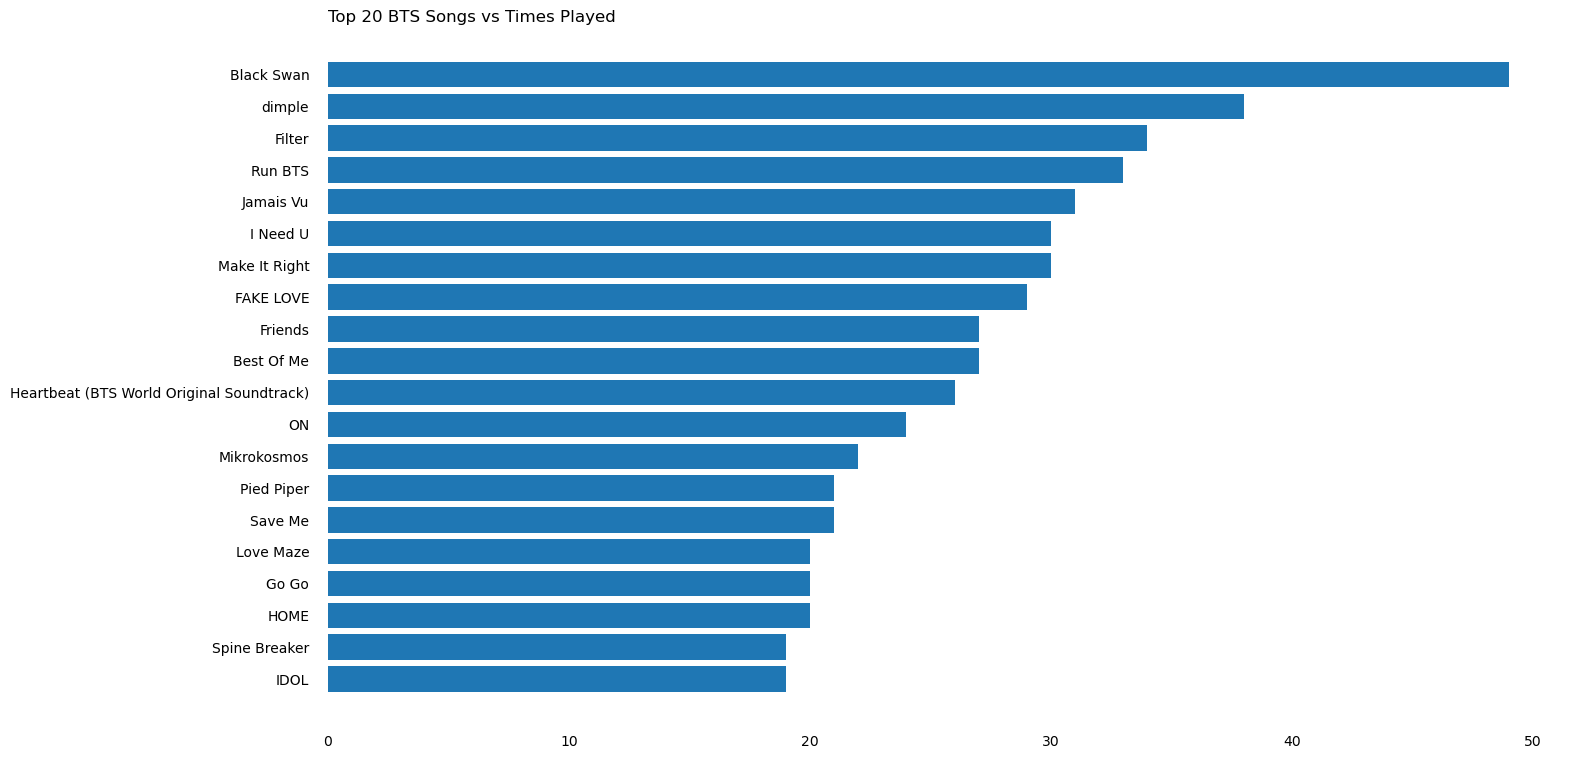

In [18]:

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(top_20_BTS['trackName'], top_20_BTS['timesPlayed'])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.invert_yaxis()

ax.set_title('Top 20 BTS Songs vs Times Played',
             loc ='left', )

From this chart it's clear that my favorite BTS song was 'Black Swan'. This would make sense as this song is part of my studying playlist which I tend to use quite often. Looking through all of the song names I notice that they come from many different albums which made me curious to see how frequently I listen to songs from various albums. 
In order to determine this I believe the best approach is to create a function that will determine which album the song comes from and save that value into a new column in the data frame 'bts'. The best way to do this will be to define a function and apply it to the track names. 

In [19]:
#I'm curious to see if we can figure out which album is my favorite
#I think I can start by making lists of all the albums and their songs 
#a dictionary might help here where the keys are album names and the values are lists of song titles 
#and then write a function to determine which album each song is 
#apply that function to the track name and then create a new column of just album 

In [20]:
#BACK LOG OF UNUSED CODE
# def pie_chart_lists(dataframe):
#     output = []
#     track = []
#     #For the purposes of this function we're going to assume the dataframe is in the same format as song_counts
#     tracks = dataframe['trackName']
#     plays = dataframe['timesPlayed']
#     reps = dataframe.shape[0]
#     for i in range(reps): 

In [21]:
#This is where I will start using the method that was described in the medium article that janine sent me. 


In [22]:
import ast
from typing import List
from os import listdir
def get_streamings(path: str = 'Spotify Account Data') -> List[dict]:
    
    files = ['Spotify Account Data/' + x for x in listdir(path)
             if x.split('.')[0][:-1] == 'StreamingHistory']
    
    all_streamings = []
    
    for file in files: 
        with open(file, 'r', encoding='UTF-8') as f:
            new_streamings = ast.literal_eval(f.read())
            all_streamings += [streaming for streaming 
                               in new_streamings]
    return all_streamings

In [23]:

import spotipy.util as util
from spotipy import Spotify as sp
username = 'sm.army'
client_id ='ae3809d4e6814ac4b9f9b96e60a612f7'
client_secret = '533e27ef651d4af499801a3d3fefdd8d'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [24]:
import requests
def get_id(track_name: str, track: str, **artist) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [
    ('q', track_name),
    ('type', 'track'),
    ]
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [25]:
lucy_id = get_id('Lucy', token, artist='The Beatles')
print(lucy_id)

0Ac9NKZTvLPMQN36oWHf5C


In [26]:
import spotipy 
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    print('testing')
    try:
        features = sp.audio_features([track_id])
        return features[0]
    except:
        return None

In [27]:
lucy_features = get_features(lucy_id, token)
print(lucy_features)

testing
{'danceability': 0.466, 'energy': 0.172, 'key': 1, 'loudness': -9.058, 'mode': 1, 'speechiness': 0.0369, 'acousticness': 0.917, 'instrumentalness': 0, 'liveness': 0.158, 'valence': 0.768, 'tempo': 81.326, 'type': 'audio_features', 'id': '0Ac9NKZTvLPMQN36oWHf5C', 'uri': 'spotify:track:0Ac9NKZTvLPMQN36oWHf5C', 'track_href': 'https://api.spotify.com/v1/tracks/0Ac9NKZTvLPMQN36oWHf5C', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0Ac9NKZTvLPMQN36oWHf5C', 'duration_ms': 139092, 'time_signature': 3}


In [28]:
streamings = get_streamings()
unique_tracks = list(set([streaming['trackName'] 
                for streaming in streamings]))

all_features = {}
for track in unique_tracks:
    track_id = get_id(track, token)
    features = get_features(track_id, token)
    if features:
        all_features[track] = features
        
with_features = []
for track_name, features in all_features.items():
    with_features.append({'name': track_name, **features})

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing


In [77]:
import spotipy.util as util
from spotipy import Spotify as sp
username = 'sm.army'
client_id ='ae3809d4e6814ac4b9f9b96e60a612f7'
client_secret = '533e27ef651d4af499801a3d3fefdd8d'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'
my_history = pd.DataFrame(with_features)
# df.to_csv('streaming_history.csv')
# my_history = pd.read_csv('streaming_history.csv')
my_history.columns

Index(['name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [78]:
import spotipy.util as util
from spotipy import Spotify
username = 'sm.army'
client_id ='ae3809d4e6814ac4b9f9b96e60a612f7'
client_secret = '533e27ef651d4af499801a3d3fefdd8d'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

# Obtain an access token using Spotipy util
token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
spotify = Spotify(auth=token)

all_of_bts_URI ='5GDuhKzwN0iBsa84eaxlkw'
# spotify_1 = sp.playlist_tracks(all_of_bts_URI)


# Retrieve tracks from the playlist using the correct method
spotify_1 = spotify.playlist_tracks(all_of_bts_URI)

# Access the 'items' key in the returned dictionary
playlist_tracks = spotify_1['items']
spotify_1

{'href': 'https://api.spotify.com/v1/playlists/5GDuhKzwN0iBsa84eaxlkw/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-12-18T02:14:42Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/a.r.m.y.skylar'},
    'href': 'https://api.spotify.com/v1/users/a.r.m.y.skylar',
    'id': 'a.r.m.y.skylar',
    'type': 'user',
    'uri': 'spotify:user:a.r.m.y.skylar'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
       'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
       'id': '3Nrfpe0tUJi4K4DXYWgMUX',
       'name': 'BTS',
       'type': 'artist',
       'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',

In [79]:
import pandas as pd
song_df = pd.DataFrame({"URI": [],
                          "Album": [],
                          "Song Name": [],
                          "Artist": [],
                          "Disc Number": [],
                          "Track Number": [],
                          "Popularity": [],
                          "Explicit": [],
                          "Danceability": [],
                          "Energy": [],
                          "Key": [],
                          "Loudness": [],
                          "Mode": [],
                          "Speechiness": [],
                          "Acousticness": [],
                          "Instrumentalness": [],
                          "Liveness": [],
                          "Valence": [],
                          "Tempo": [],
                          "Duration_ms": [],
                          "Time Signature": []})



# idx = 0

# for hundred_songs in [spotify_1]:
#     for i, metadata in enumerate(hundred_songs["items"]):

#         uri = metadata["track"]["uri"].split(":")[2]
#         album = metadata["track"]["album"]["name"]
#         song_name = metadata["track"]["name"]
#         artists = metadata["track"]["artists"]
#         artists_string = ""
#         for artist in artists:
#             artists_string = artists_string + artist['name'] +"; "
#         artists_string = artists_string.strip("; ")

            
        
#         #Popularity of the track
#         track_pop = metadata["track"]["popularity"]
        
#         disc_number = metadata["track"]["disc_number"]
#         track_number = metadata["track"]["track_number"]
        
#         exp = metadata["track"]["explicit"]

#         song = sp.audio_features(uri)[0]
idx = 0
for metadata in playlist_tracks:
    uri = metadata["track"]["uri"].split(":")[2]
    album = metadata["track"]["album"]["name"]
    song_name = metadata["track"]["name"]
    artists = metadata["track"]["artists"]
    artists_string = ""
    for artist in artists:
        artists_string = artists_string + artist['name'] + "; "
    artists_string = artists_string.strip("; ")

    # Popularity of the track
    track_pop = metadata["track"]["popularity"]

    disc_number = metadata["track"]["disc_number"]
    track_number = metadata["track"]["track_number"]

    exp = metadata["track"]["explicit"]

    # Use the correct Spotify object here
    song = spotify.audio_features(uri)[0]
    dan = song['danceability']
    ene = song['energy']
    key = song['key']
    lou = song['loudness']
    mod = song['mode']
    spe = song['speechiness']
    aco = song['acousticness']
    ins = song['instrumentalness']
    liv = song['liveness']
    val = song['valence']
    tem = song['tempo']
    dur = song['duration_ms']
    tim = song['time_signature']

    song_df.loc[idx] = [uri, album, song_name, artists_string, disc_number, track_number, track_pop, exp, 
                               dan, ene, key, lou, mod, spe, aco,
                               ins, liv, val, tem, dur, tim]
    idx += 1

song_df.to_csv('all_BTS')
song_df


,URI,Album,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,6pp6xf9zS55GD4nr318XUH,Love Yourself 承 'Her',dimple,BTS,1,4,72,False,0.612,0.844,...,-4.694,0,0.0757,0.14000,0.000000,0.2890,0.652,134.872,196776,4
1,4bZZVcgWWMWPBwzTTp642w,MAP OF THE SOUL : 7,Filter,BTS,1,8,74,False,0.779,0.762,...,-5.188,0,0.0631,0.02240,0.000000,0.1210,0.859,110.043,180221,4
2,69xohKu8C1fsflYAiSNbwM,Proof,Run BTS,BTS,2,1,81,False,0.724,0.818,...,-3.747,1,0.1680,0.02010,0.000000,0.0358,0.696,77.004,204940,4
3,7cgWWkpUaS94xoWI8lMGiI,MAP OF THE SOUL : PERSONA,Jamais Vu,BTS,1,6,64,False,0.608,0.470,...,-6.730,1,0.0428,0.22600,0.000000,0.0963,0.241,81.000,227275,4
4,3wQnyXNFXNUEOBt1pb4urq,The Most Beautiful Moment in Life Pt.1,I Need U,BTS,1,2,71,False,0.478,0.880,...,-3.097,0,0.0739,0.02130,0.000000,0.2400,0.707,158.356,210987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,6dNOlenVY8vp29pkMZOd7c,Wings,Interlude: Wings,BTS,1,15,59,False,0.638,0.851,...,-3.042,0,0.0663,0.01020,0.000000,0.1140,0.600,124.992,144314,4
80,1MX0g22bQkr9HDVe37fLnN,Love Yourself 轉 'Tear',134340,BTS,1,4,66,False,0.665,0.687,...,-6.466,0,0.0547,0.15500,0.000093,0.1730,0.651,106.023,230063,4
81,1nWB8isqs2tviWk20G5pow,Wings,Lie,BTS,1,4,69,False,0.541,0.779,...,-5.581,0,0.0330,0.00338,0.000000,0.1770,0.501,94.069,215753,3
82,6fqaMyg066xlukvUJWdM2T,MAP OF THE SOUL : 7,00:00 (Zero O’Clock),BTS,1,13,71,False,0.560,0.547,...,-6.456,1,0.0675,0.08060,0.000000,0.1100,0.199,157.962,250296,4


In [110]:
all_BTS_df = song_df

I have now successfully obtained a data frame that contains all the information about the top 84 BTS songs I listend to in the last year. <br> Note: Since the Spotify API gave me a 100 song limit on the number of songs I could use I am only considering their full-Korean albums to make more space. I also determined earlier that I listened to 112 different BTS songs which exceeds the limit given to me. So instead I have queried out songs that I only listened to once in the previous year. My reasoning was that since I only listened to the song one time they have little weight on what my favorite albums are. It is also likely that a fair number of these of these songs were only played one time because they automatically played after a different song that I was listening to. 

Now we can begin to analyze how my favorite songs compare to my favorite albums. 

In [111]:
mult_plays = song_counts[song_counts['timesPlayed'] != 1]
all_BTS_df

,URI,Album,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,6pp6xf9zS55GD4nr318XUH,Love Yourself 承 'Her',dimple,BTS,1,4,72,False,0.612,0.844,...,-4.694,0,0.0757,0.14000,0.000000,0.2890,0.652,134.872,196776,4
1,4bZZVcgWWMWPBwzTTp642w,MAP OF THE SOUL : 7,Filter,BTS,1,8,74,False,0.779,0.762,...,-5.188,0,0.0631,0.02240,0.000000,0.1210,0.859,110.043,180221,4
2,69xohKu8C1fsflYAiSNbwM,Proof,Run BTS,BTS,2,1,81,False,0.724,0.818,...,-3.747,1,0.1680,0.02010,0.000000,0.0358,0.696,77.004,204940,4
3,7cgWWkpUaS94xoWI8lMGiI,MAP OF THE SOUL : PERSONA,Jamais Vu,BTS,1,6,64,False,0.608,0.470,...,-6.730,1,0.0428,0.22600,0.000000,0.0963,0.241,81.000,227275,4
4,3wQnyXNFXNUEOBt1pb4urq,The Most Beautiful Moment in Life Pt.1,I Need U,BTS,1,2,71,False,0.478,0.880,...,-3.097,0,0.0739,0.02130,0.000000,0.2400,0.707,158.356,210987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,6dNOlenVY8vp29pkMZOd7c,Wings,Interlude: Wings,BTS,1,15,59,False,0.638,0.851,...,-3.042,0,0.0663,0.01020,0.000000,0.1140,0.600,124.992,144314,4
80,1MX0g22bQkr9HDVe37fLnN,Love Yourself 轉 'Tear',134340,BTS,1,4,66,False,0.665,0.687,...,-6.466,0,0.0547,0.15500,0.000093,0.1730,0.651,106.023,230063,4
81,1nWB8isqs2tviWk20G5pow,Wings,Lie,BTS,1,4,69,False,0.541,0.779,...,-5.581,0,0.0330,0.00338,0.000000,0.1770,0.501,94.069,215753,3
82,6fqaMyg066xlukvUJWdM2T,MAP OF THE SOUL : 7,00:00 (Zero O’Clock),BTS,1,13,71,False,0.560,0.547,...,-6.456,1,0.0675,0.08060,0.000000,0.1100,0.199,157.962,250296,4


First we group 'all_BTS_df' by the albums. I have reset the index to make sure that I can treat the 'Album' column as a series in the future. 

In [123]:
grouped_by_album = all_BTS_df.groupby('Album').count().reset_index()
grouped_by_album

,Album,URI,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,2 Cool 4 Skool,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,A Brand New Day (BTS World Original Soundtrack...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,BE,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,BTS WORLD (Original Soundtrack),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Come Back Home,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,The Most Beautiful Moment in Life Pt.2,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
19,The Most Beautiful Moment in Life: Young Forever,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
20,The Planet,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
21,Wings,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


Since the count() aggregator just counts the number of matching instances per album we can just look one of these columns. In this case I'll use the URI column to do this and sort in descending order. 

In [124]:
sorted_grouped_by_album = grouped_by_album.sort_values('URI', ascending=False)[['Album', 'URI']]
sorted_grouped_by_album

,Album,URI
11,MAP OF THE SOUL : 7,9
8,Love Yourself 承 'Her',9
9,Love Yourself 結 'Answer',9
10,Love Yourself 轉 'Tear',9
12,MAP OF THE SOUL : PERSONA,6
...,...,...
6,Dream Glow (BTS World Original Soundtrack) (Pt...,1
16,Take Two,1
4,Come Back Home,1
3,BTS WORLD (Original Soundtrack),1


Now we can visualize this and compare it with our song information from before.

Text(0.0, 1.0, 'BTS Albums vs Top Songs per Album')

/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_fi

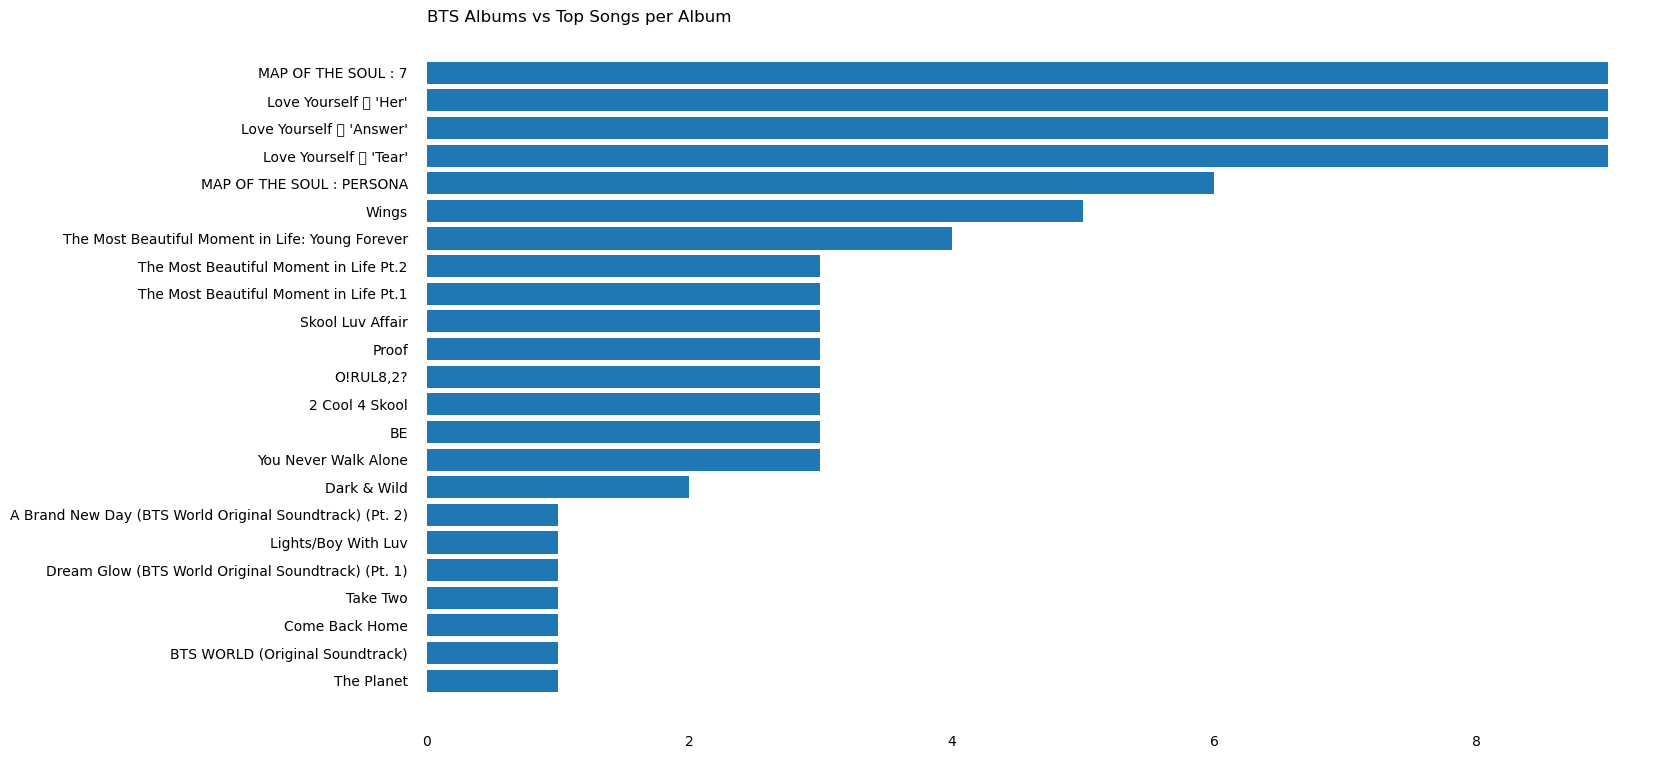

In [125]:
albums = sorted_grouped_by_album['Album']
songs_per_album = sorted_grouped_by_album['URI'] 
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(albums, songs_per_album)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.invert_yaxis()

ax.set_title('BTS Albums vs Top Songs per Album',
             loc ='left', )

Based on this visualization we can see that four different albums have the same number of songs that appear in my top BTS songs. To truly determine which of these four albums is my favorite I'm going to create a new data frame called 'top_four_albums' which only contains songs from these albums. Then I will see how many songs in the top 10 of 'song_counts' appear in the corresponding albums. 

In [135]:
top_10_songs = song_counts.take(np.arange(0,10))
top_10_songs

,trackName,timesPlayed
0,Black Swan,49
1,dimple,38
2,Filter,34
3,Run BTS,33
4,Jamais Vu,31
5,I Need U,30
6,Make It Right,30
7,FAKE LOVE,29
8,Friends,27
9,Best Of Me,27


In [141]:
song_counts

,trackName,timesPlayed
0,Black Swan,49
1,dimple,38
2,Filter,34
3,Run BTS,33
4,Jamais Vu,31
...,...,...
107,N.O,1
108,Outro: Luv in Skool,1
109,Outro: Wings,1
110,Permission to Dance,1


In [143]:
top_four_album_names = sorted_grouped_by_album['Album'].take(np.arange(0, 4))
top_four_album_names
top_four_albums = all_BTS_df[all_BTS_df['Album'].isin(top_four_album_names)]
top_four_albums 

,URI,Album,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,6pp6xf9zS55GD4nr318XUH,Love Yourself 承 'Her',dimple,BTS,1,4,72,False,0.612,0.844,...,-4.694,0,0.0757,0.14000,0.000000,0.2890,0.652,134.872,196776,4
1,4bZZVcgWWMWPBwzTTp642w,MAP OF THE SOUL : 7,Filter,BTS,1,8,74,False,0.779,0.762,...,-5.188,0,0.0631,0.02240,0.000000,0.1210,0.859,110.043,180221,4
6,6m1TWFMeon7ai9XLOzdbiR,Love Yourself 轉 'Tear',FAKE LOVE,BTS,1,2,77,False,0.557,0.719,...,-4.515,0,0.0371,0.00267,0.000000,0.3060,0.345,77.502,242334,4
7,5RjUtRlDonw3TBgGGMLC5b,MAP OF THE SOUL : 7,Friends,BTS,1,15,68,False,0.550,0.747,...,-5.211,1,0.0407,0.06680,0.000000,0.0536,0.649,79.979,199339,4
8,5C6A1WXVfKvBBQmaFFnBgs,Love Yourself 承 'Her',Best Of Me,BTS,1,3,68,False,0.655,0.756,...,-4.388,1,0.0700,0.02980,0.000000,0.3960,0.469,121.936,227191,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0wqqe8k13bJPxRt7FEmnwS,Love Yourself 轉 'Tear',So What,BTS,1,10,67,False,0.657,0.883,...,-4.294,0,0.0733,0.02380,0.000000,0.0481,0.461,129.943,281521,4
76,2QZe2H1f03t5PJWEMg2Mbe,MAP OF THE SOUL : 7,UGH!,BTS,1,12,67,False,0.720,0.824,...,-5.086,0,0.1280,0.03940,0.000000,0.0509,0.333,165.996,225012,4
80,1MX0g22bQkr9HDVe37fLnN,Love Yourself 轉 'Tear',134340,BTS,1,4,66,False,0.665,0.687,...,-6.466,0,0.0547,0.15500,0.000093,0.1730,0.651,106.023,230063,4
82,6fqaMyg066xlukvUJWdM2T,MAP OF THE SOUL : 7,00:00 (Zero O’Clock),BTS,1,13,71,False,0.560,0.547,...,-6.456,1,0.0675,0.08060,0.000000,0.1100,0.199,157.962,250296,4


I'm now going to merge this with the 'top_four_albums' data frame with the 'song_counts' data frame. And then query out just the 'Album', 'Song Name', and 'Times Played' columns so we can get a better look of the relevant information. <br> Note: For consistency I also renamed the 'timesPlayed' column to 'Times Played'.

In [164]:
#i just want to see what happens if i merge this with top song counts on the song name column
merged = top_four_albums.merge(song_counts, left_on='Song Name', right_on = 'trackName')
merged = merged.assign(Times_Played = merged['timesPlayed'])
merged = merged.rename(columns={'Times_Played': 'Times Played'})
top_four_albums_w_counts = merged[['Album', 'Song Name', 'Times Played']].sort_values('Times Played', ascending = False)
top_four_albums_w_counts

,Album,Song Name,Times Played
35,MAP OF THE SOUL : 7,Black Swan,49
0,Love Yourself 承 'Her',dimple,38
1,MAP OF THE SOUL : 7,Filter,34
2,Love Yourself 轉 'Tear',FAKE LOVE,29
4,Love Yourself 承 'Her',Best Of Me,27
...,...,...,...
30,Love Yourself 承 'Her',MIC Drop,2
31,Love Yourself 轉 'Tear',So What,2
32,MAP OF THE SOUL : 7,UGH!,2
33,Love Yourself 轉 'Tear',134340,2


Now let us try and see how many of my top 10 BTS songs came from which albums. First we take out the top 10 rows, I'll store them in a data frame called 'top_10'.

In [165]:
top_20 = top_four_albums_w_counts.take(np.arange(0,20))
top_20

,Album,Song Name,Times Played
35,MAP OF THE SOUL : 7,Black Swan,49
0,Love Yourself 承 'Her',dimple,38
1,MAP OF THE SOUL : 7,Filter,34
2,Love Yourself 轉 'Tear',FAKE LOVE,29
4,Love Yourself 承 'Her',Best Of Me,27
...,...,...,...
14,Love Yourself 結 'Answer',Euphoria,16
15,Love Yourself 承 'Her',Outro: Her,15
16,Love Yourself 結 'Answer',Trivia 承 : Love,14
19,Love Yourself 結 'Answer',Trivia 轉 : Seesaw,12


Now we group by the album and the song names to organize everything into these groups. 

In [166]:
grouped_top_20 = top_20.groupby(['Album', 'Song Name']).max()
grouped_top_20 

Times Played
Album                 Song Name                                     
Love Yourself 承 'Her' Best Of Me                                  27
                      Go Go                                       20
                      Intro: Serendipity                          16
                      Outro: Her                                  15
                      Pied Piper                                  21
...                                                              ...
MAP OF THE SOUL : 7   Filter                                      34
                      Friends                                     27
                      Louder than bombs                           12
                      ON                                          24
                      We are Bulletproof : the Eternal            16

[20 rows x 1 columns]

/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  func(*args, **kwargs)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/suhanisharma/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  fig.canvas.print_fi

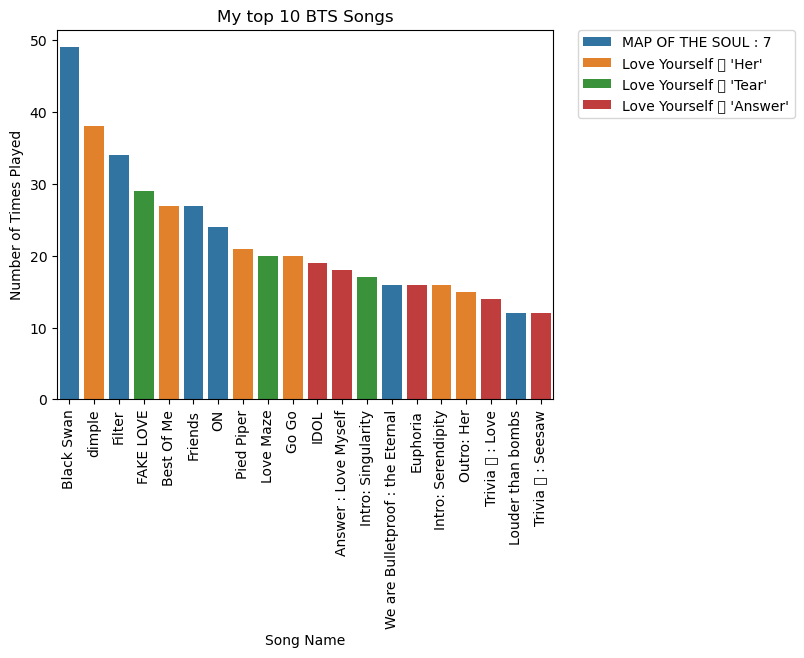

In [167]:
import seaborn as sns
grouped_top_20_reset_index  = grouped_top_20.reset_index()

# Sort the DataFrame by 'Times Played' in descending order
grouped_top_20_reset_index_sorted = grouped_top_20_reset_index.sort_values(by='Times Played', ascending=False)

# Plot the barplot with the sorted DataFrame
ax = sns.barplot(x='Song Name', y='Times Played', data=grouped_top_20_reset_index_sorted, hue='Album', dodge=False)

plt.title("My top 10 BTS Songs")
plt.xticks(rotation=90)
plt.ylabel("Number of Times Played")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

And from this I can determine that many of my top songs come from the album "MAP OF THE SOUL: 7". 